<a href="https://colab.research.google.com/github/usharachamadugu/Data-Analysis-with-python/blob/master/startup_funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Top Funding Startups in India**




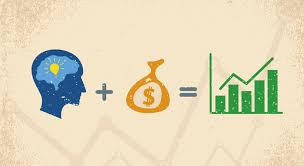

This notebook explores the analysis of indian startup funding and basically gives answer of following questions :-

1) How does the funding ecosystem change with time ?(Number of funding per month)

2) How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)

3) Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?

4) Do cities play a major role in funding ? (OR) Which city has maximum startups ?

5)Who is the important investors in the Indian Ecosystem?
What are different types of funding for startups ?

In [28]:
from google.colab import files
uploaded = files.upload()

Saving startup_funding.csv to startup_funding (1).csv


In [0]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['startup_funding.csv']))

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
color = sns.color_palette()


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
pd.options.mode.chained_assignment = None
#pd.options.display.max_columns = 999

In [33]:
df2.head()#returns top 5 rows

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [34]:
df2.columns# returns columns names

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [35]:
print("Size of data(Rows, Columns)",df2.shape)# returns no of rows and columns

Size of data(Rows, Columns) (2372, 10)


In [0]:
# missing data 
total = df2.isnull().sum().sort_values(ascending = False)
percent = ((df2.isnull().sum()/df2.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.head()

In [36]:
del df2["Remarks"]
df2.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


In [37]:
df2["AmountInUSD"] = df2["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))#Now convert the string "AmountInUSD" into numeric
df2["AmountInUSD"] = pd.to_numeric(df2["AmountInUSD"])
df2.head()


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0


In [0]:
### Some more fixes in the data format. Will try to fix in the input file in next version #
df2['Date'][df2['Date']=='12/05.2015'] = '12/05/2015'
df2['Date'][df2['Date']=='13/04.2015'] = '13/04/2015'
df2['Date'][df2['Date']=='15/01.2015'] = '15/01/2015'
df2['Date'][df2['Date']=='22/01//2015'] = '22/01/2015'
df2["yearmonth"] = (pd.to_datetime(df2['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df2['Date'],format='%d/%m/%Y').dt.month)
temp = df2['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = df2['yearmonth'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

Ques 2 : How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)

In [38]:
print("Maximum funding to a Startups is : ",df2["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  1400000000.0


In [39]:
df2[df2.AmountInUSD == 1400000000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
294,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09


In [40]:
df2[df2.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
821,821,30/8/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07
1787,1787,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08
2218,2218,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN
2276,2276,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN


As we can see Paytm and Flipkart got maximum funding of 1400000000 USD. Now lats see least funding.

In [41]:
print("Minimum funding to a Startups is : ",df2["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  16000.0


In [42]:
df2[df2.AmountInUSD == 16000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
2345,2345,19/01/2015,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2346,2346,19/01/2015,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2347,2347,19/01/2015,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2348,2348,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2349,2349,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0


Now as we can see Hostel Dunia, Play your sport, Yo Grad, Enabli and CBS are least funded Startups i.e, 16000 USD

In [43]:
print("On Average indian startups got funding of : ",df2["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  12031073.099016393


Total startups funded :  2001
Swiggy       7
UrbanClap    6
Medinfi      5
NoBroker     5
Paytm        5
Jugnoo       5
Wooplr       4
Niki.ai      4
HolaChef     4
Flipkart     4
Name: StartupName, dtype: int64


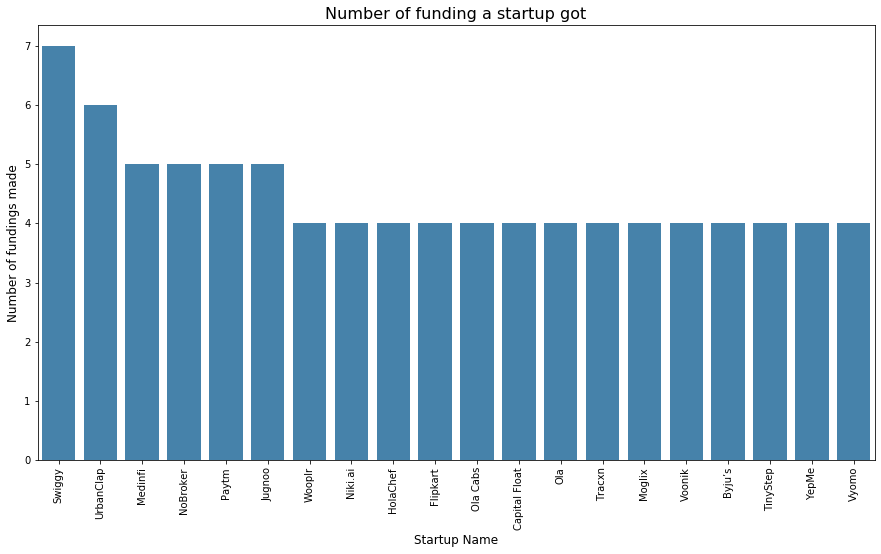

In [44]:
print("Total startups funded : ", len(df2["StartupName"].unique()))
print(df2["StartupName"].value_counts().head(10))
startupname = df2['StartupName'].value_counts().head(20)
plt.figure(figsize=(15,8))
sns.barplot(startupname.index, startupname.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funding a startup got", fontsize=16)
plt.show()

Ques 3 : Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: IndustryVertical, dtype: int64


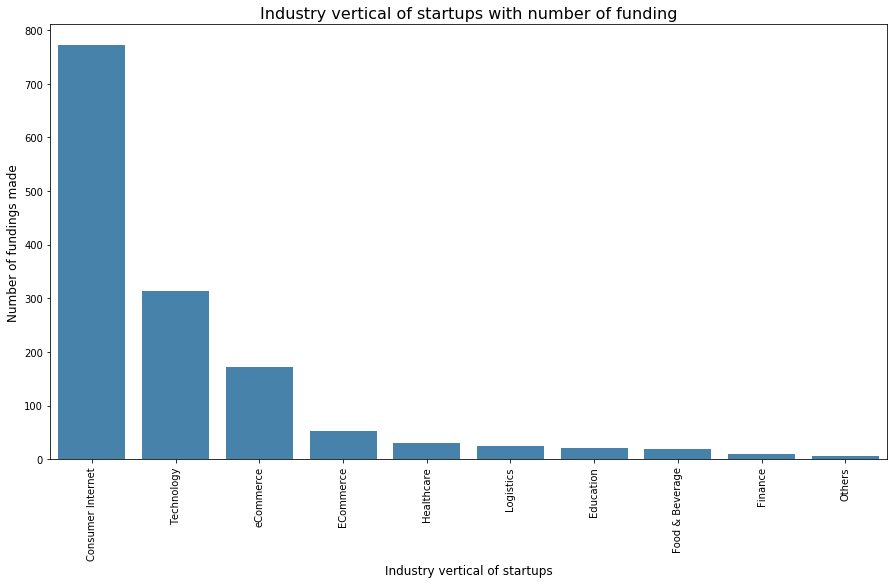

In [45]:
industry = df2['IndustryVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Ques 4 : Do cities play a major role in funding ? (OR) Which city has maximum startups ?

Online Pharmacy                   9
Food Delivery Platform            8
Online lending platform           5
Online Learning Platform          4
Fitness Mobile App                3
Online Payment Gateway            3
Data Analytics platform           3
ECommerce Marketplace             3
Online Lending platform           2
Healthy Food Delivery platform    2
Name: SubVertical, dtype: int64


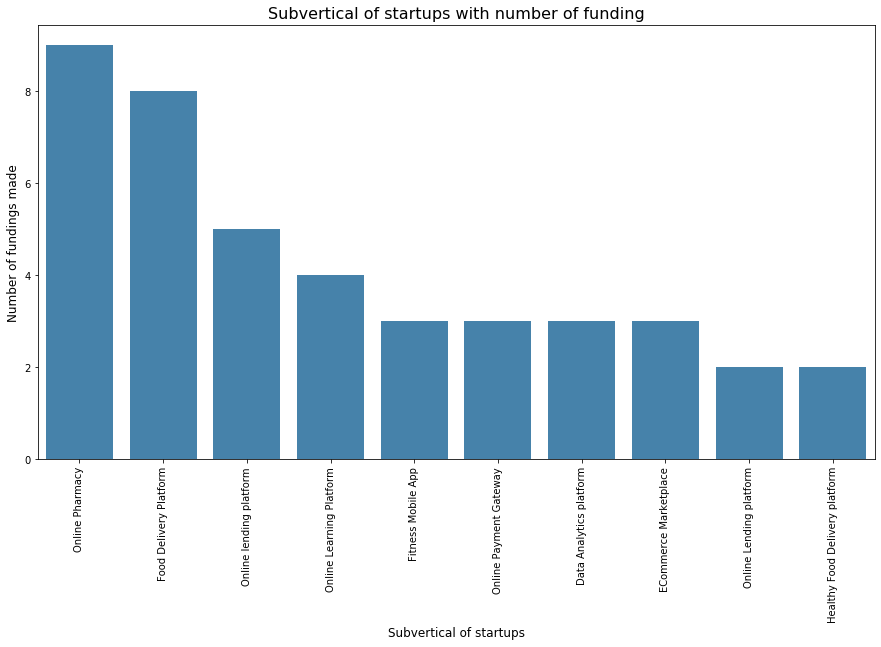

In [46]:
industry = df2['SubVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64


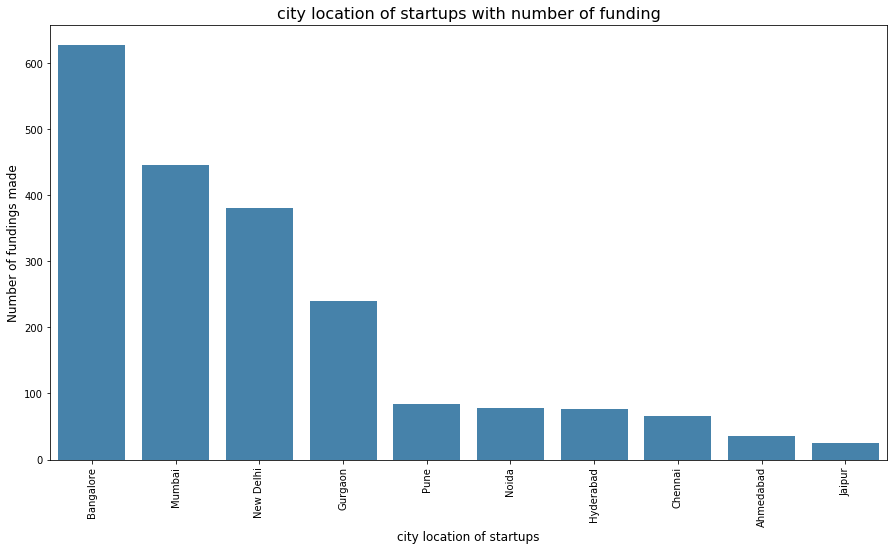

In [47]:
city = df2['CityLocation'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(city.index, city.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

Ques 5 : Who is the important investors in the Indian Ecosystem?

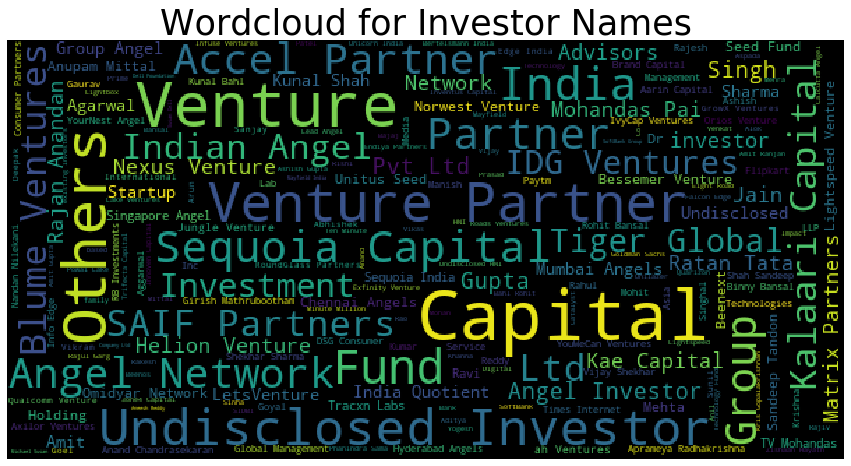

In [48]:
from wordcloud import WordCloud

names = df2["InvestorsName"][~pd.isnull(df2["InvestorsName"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

Undisclosed Investors       33
Undisclosed investors       27
Indian Angel Network        24
Ratan Tata                  24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
RoundGlass Partners         10
Undisclosed Investor        10
Name: InvestorsName, dtype: int64


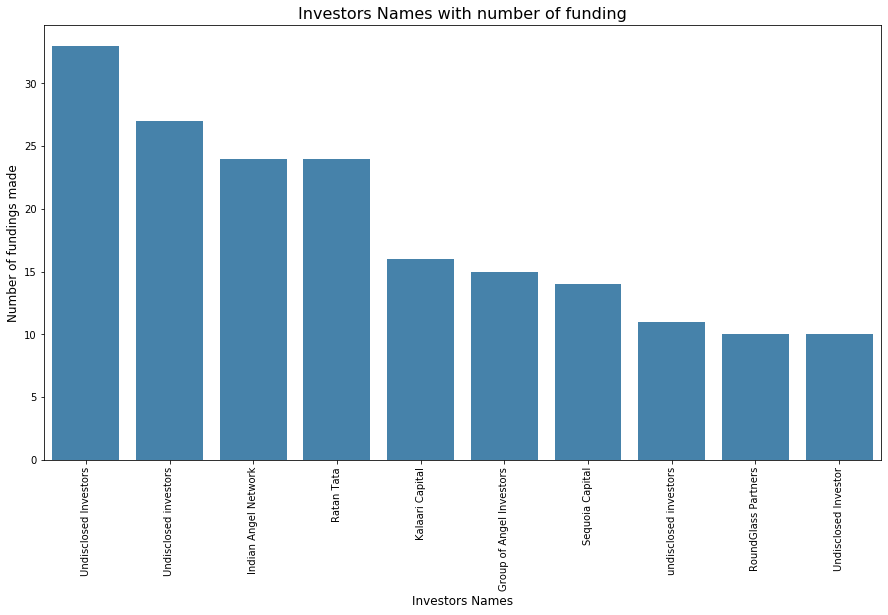

In [49]:
investors = df2['InvestorsName'].value_counts().head(10)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

Ques 6 : What are different types of funding for startups ?

In [50]:
investment = df2['InvestmentType'].value_counts()
print(investment)

Seed Funding      1271
Private Equity    1066
SeedFunding         30
Crowd funding        1
Crowd Funding        1
Debt Funding         1
PrivateEquity        1
Name: InvestmentType, dtype: int64
